#  Instacart Analysis

This analysis aims to explore customer behavior on the Instacart platform during the year 2017.

### Key Objectives:

-Understand customer purchases and patterns: Analyze the buying behavior of customers to identify their preferences, frequency of purchases, and trends over time.

-Answer questions and find insights to improve the purchasing experience: Extract meaningful insights from the data to enhance the overall shopping experience for customers, leading to increased satisfaction and loyalty.

-Improve product placement and recommend potential upsell: Utilize data-driven approaches to optimize product placement within the platform and explore opportunities for upselling complementary or related items.

### Business Questions of Interest:

-Which are the most popular items purchased, and which are the least popular? Identify the top-selling products and those that are underperforming to focus on strategic improvements.

-What does the distribution of the products purchased look like? Visualize and analyze the distribution of purchases to understand how frequently certain products are bought and identify potential outliers.

-Do customers purchase items together frequently, and which products are most often purchased together? Conduct association analysis to identify product co-occurrence patterns and discover items commonly bought together.

-Can we use this information to recommend other products based on a customer’s cart? Explore the possibility of implementing a recommendation system that suggests related or complementary products based on a customer's current cart items, leading to increased cross-selling opportunities.



### Table of content

1. [load the data](#load-the-data)


2. [Preprocessing the data](#Preprocessing-the-data)


3. [Preprocessing Summary](#Preprocessing-Summary)


# load the data


In [2]:
#load the libraires
import pandas as pd 
import numpy as np 

In [3]:
# read the data
#reading in the data
insta_or = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
pro = pd.read_csv('/datasets/products.csv', sep=';')
or_pro = pd.read_csv('/datasets/order_products.csv', sep=';')
ais = pd.read_csv('/datasets/aisles.csv', sep=';')
dep = pd.read_csv('/datasets/departments.csv', sep=';')

In [4]:
#checking dataframe-instcart_orders
insta_or.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
#summary of dataframe-instcart_orders
insta_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
#checking dataframe-products
pro.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
#summary of dataframe-products
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
#checking dataframe-order_products
or_pro.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [9]:
#summary of dataframe-order_products
or_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [10]:
#checking dataframe-aisles
ais.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
#summary of dataframe-aisles
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [12]:
#checking dataframe-departments
dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
#summary of dataframe-departments
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


# Preprocessing the data

## Find and remove duplicate values 

### `orders` data frame

In [14]:
# Check for duplicated orders
duplicates = insta_or.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 15


There are 15 duplicates in the insta_or dataframe

In [15]:
#identify of partial duplicates
# Check for partial duplicates (duplicates based on specific columns)
partial_dupes = ['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
partial_duplicates = insta_or.duplicated(subset=partial_dupes, keep=False)
print("Partial duplicates count:", partial_duplicates.sum())


Partial duplicates count: 30


If the result shows that there are 15 exact duplicates and 30 partial duplicates, it means that there are 15 rows in the DataFrame that have exactly the same values in all columns (exact duplicates), and there are 30 rows that have the same values in the specified subset of columns (user_id, order_number, order_dow, order_hour_of_day, and days_since_prior_order),
but they might have different values in other columns (partial duplicates).

In [16]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_order=insta_or[(insta_or['order_dow']==3) & (insta_or['order_hour_of_day']==2)]
display(wednesday_order)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [17]:
# Remove exact duplicate orders
insta_or.drop_duplicates(inplace=True)

In [18]:
# Double check for duplicate rows
insta_or.duplicated().sum()

0

In [19]:
# Double check for duplicate order IDs only
print(insta_or['order_id'].duplicated().sum()) 

0


Following the duplicates removal, the insta_or dataframe has been successfully cleansed of any duplicate entries. The 'drop_duplicates' method was utilized for this purpose, allowing us to eliminate redundant rows based on specific columns, resulting in a dataset that is now free of duplicates.

There are several compelling reasons for performing this deduplication process:

Enhanced Data Integrity: Duplicate records can originate from a variety of sources, such as human error during data entry or technical glitches. By eliminating duplicates, we bolster the data's integrity, ensuring that each piece of information is accurately represented only once. This, in turn, fortifies the reliability of our analyses and models.

Consistency and Accuracy: With duplicate records removed, the consistency of the dataset is significantly improved. Inconsistent data can lead to erroneous conclusions when conducting analyses or training machine learning models. A clean dataset reduces the risk of skewing results and enhances the accuracy of any insights drawn from the data.

Optimized Resource Utilization: Removing duplicates contributes to better memory efficiency by reducing the overall size of the DataFrame. By conserving memory space, we enhance the performance of data processing operations, making them more efficient and faster.

-Why duplicate values may have been present in the dataset:

The presence of duplicate values can be attributed to various factors, some of which include:

Order Repeated: In the context of instacart orders, it is conceivable that users might place the same order multiple times, leading to the creation of identical records in the dataset.

Data Collection Errors: During the process of gathering and compiling data, errors may arise, causing identical entries to appear more than once in the dataset.

Merging Data from Multiple Sources: If data from diverse sources is integrated into this dataset without careful handling, it is possible that duplicate entries emerge during the merging process.

### `products` data frame

In [20]:
# Check for fully duplicate rows
duplicate_rows = pro.duplicated()

# Print the fully duplicate rows
print("Number of duplicate rows:",duplicate_rows.sum())  # Number of fully duplicate rows


Number of duplicate rows: 0


In [21]:
# Check for just duplicate product IDs
duplicated_pro_id=pro.duplicated(subset='product_id',keep=False)
num_pro_id=duplicated_pro_id.sum()
print("Number of duplicate product IDs:",num_pro_id)

Number of duplicate product IDs: 0


In [22]:
# Check for just duplicate product names (convert names to lowercase to compare better)
#convert product_name to lower case
pro['product_name']=pro['product_name'].str.lower()
#check for duplicate in product_name
print('Number of duplicate product_name:',pro['product_name'].duplicated().sum())

Number of duplicate product_name: 1361


In [23]:
# Check for duplicate product names that aren't missing
duplicate_not_miss=pro[(pro['product_name'].isna() == False) & (pro['product_name'].duplicated())]['product_name'].sum()
total_num_not_miss=len(duplicate_not_miss)
print(total_num_not_miss)

2992


### `departments` data frame

In [24]:
# Check for duplicate in each column of 'departments' DataFrame
print(f"department_id has {dep['department_id'].duplicated().sum()} duplicates")
print(f"department has {dep['department'].duplicated().sum()} duplicates")

department_id has 0 duplicates
department has 0 duplicates


Department has 0 cduplicates

### `aisles` data frame

In [25]:
#checking for duplicates in aisles
ais.duplicated().sum()

0

In [26]:
#check for duplicate for each row in aisles
# Check for duplicate in each column of 'departments' DataFrame
print(f"ais_id has {ais['aisle_id'].duplicated().sum()} duplicates")
print(f"ais has {ais['aisle'].duplicated().sum()} duplicates")

ais_id has 0 duplicates
ais has 0 duplicates


### `order_products` data frame

In [27]:
# Check for fullly duplicate rows

or_pro.duplicated().sum()

0

In [28]:
# Double check for any other tricky duplicates
print(f"order_id has {or_pro['order_id'].duplicated().sum()} duplicates")
print(f"product_id has {or_pro['product_id'].duplicated().sum()} duplicates")


order_id has 4094961 duplicates
product_id has 4499434 duplicates


In the provided code, we first perform a double-check for any tricky duplicates in the DataFrame 'or_pro'. The lines of code print the number of duplicates in the 'order_id' and 'product_id' columns using the duplicated() method and sum() function, which allows us to identify the count of duplicated entries in each column. This step is essential to gain insights into the extent of duplication present in the dataset.

After the double-check, we proceed to remove the duplicates from the 'order_id' and 'product_id' columns using the drop_duplicates() method. The rationale behind using this method is to ensure that each order ID and product ID appears only once in the DataFrame.
As for the reasons behind the presence of missing and duplicate values in the dataset, several factors might have contributed to this:
Data Entry Errors: Missing values may arise from human errors during data entry or data collection processes. Duplicate entries might occur due to unintentional repetitions or incorrect data input.

Data Integration: If the dataset is compiled from multiple sources, there could be overlapping or redundant data, leading to duplicate entries.

Data Preprocessing Issues: Incomplete data cleaning or normalization procedures might result in missing values.

Systematic Errors: Errors in the data processing pipeline or data storage systems can lead to missing values or duplication.

Unique Identifiers: Sometimes, unique identifiers like order IDs or product IDs might not be assigned correctly, causing duplicates in the dataset.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super </div>

## Find and remove missing values


### `products` data frame

In [29]:
#looking at missing values 
pro.isna().sum() 

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [30]:
# Are all of the missing product names associated with aisle ID 100?
#  the rows with missing product names
pro_missing = pro[pro['product_name'].isna()]

# Step 2: Check if all missing product names are associated with aisle ID 100
products_missing_aisle_100 = pro[pro['aisle_id'] == 100].isna().sum()
print(products_missing_aisle_100)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [31]:
# Are all of the missing product names associated with department ID 21?
products_missing_dep_21 = pro[pro['department_id'] == 21].isna().sum()
print(products_missing_aisle_100)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [32]:
# What is this ailse and department?
print('ailse_100 missing value :',products_missing_aisle_100)
print('department_21 missing value:' ,products_missing_aisle_100)

ailse_100 missing value : product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
department_21 missing value: product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [33]:
# Fill missing product names with 'Unknown'
pro['product_name'].fillna(value='Unknown', inplace=True)

### `orders` data frame

In [34]:
#looking at orders missing value
or_pro.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [35]:
# Are there any missing values where it's not a customer's first order?
# Filter rows where it's not a customer's first order
not_first_order = insta_or[insta_or['order_number'] != 1]

# Step 2: Check for missing values in the filtered DataFrame
not_first_order_missing = not_first_order.isna().sum()

# Print the results
print("Missing values in orders where it's not a customer's first order:")
print(not_first_order_missing)

Missing values in orders where it's not a customer's first order:
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [36]:
#look at order_products
or_pro.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [37]:
# What are the min and max values in this column?
print(or_pro['add_to_cart_order'].min())
print(or_pro['add_to_cart_order'].max())

1.0
64.0


In [38]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Create a DataFrame with missing 'add_to_cart_order'
missing_add_to_cart_order = or_pro[or_pro['add_to_cart_order'].isna()]

# Create a DataFrame with all the orders that have at least one missing 'add_to_cart_order'
missing_order = or_pro.query("order_id in @missing_add_to_cart_order.order_id")

# Display the first few rows of the resulting DataFrame
missing_order.head()

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0


In [39]:
# Do all orders with missing values have more than 64 products?
# Count the number of products in each order using 'order_id' as the grouping key
order_product_counts = missing_order['order_id'].value_counts()

# Check if all orders with missing values have more than 64 products
orders_more_than_64_products = all(order_product_counts > 64)

# Print the result
print(orders_more_than_64_products)

True


In [40]:
# Fill missing values in the 'add_to_cart_order' column with '999'
or_pro.loc[:, 'add_to_cart_order'] = or_pro['add_to_cart_order'].fillna('999')

# Convert the 'add_to_cart_order' column to integer data type
or_pro.loc[:, 'add_to_cart_order'] = or_pro['add_to_cart_order'].astype(int)

Based on the given code, missing product names in the DataFrame 'pro' were filled using the value 'Unknown'. The 'fillna()' method was employed to achieve this. The reason for using this method is to ensure that all products have a valid name, even if the original data had missing entries. By filling the missing product names with 'Unknown', we can avoid potential issues that could arise from working with NaN values in the 'product_name' column.

# Preprocessing Summary

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [41]:
# Check the range of 'order_hour_of_day'
print(insta_or['order_hour_of_day'].min())  # Should be 0
print(insta_or['order_hour_of_day'].max())

0
23


In [42]:
# Check the range of 'order_dow'
print(insta_or['order_dow'].min())  # Should be 0
print(insta_or['order_dow'].max())  # Should be 6

0
6


### [A2] What time of day do people shop for groceries?

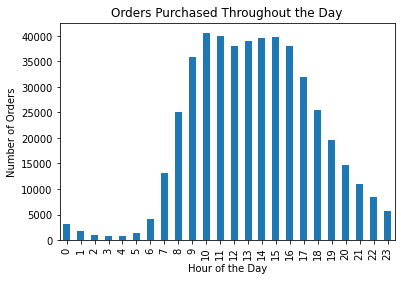

<Figure size 1080x576 with 0 Axes>

In [64]:
from matplotlib import pyplot as plt
shop_time_of_day = insta_or['order_hour_of_day'].value_counts().sort_index()
shop_time_of_day.plot(kind='bar',
                      title='Orders Purchased Throughout the Day',
                      xlabel='Hour of the Day',
                      ylabel='Number of Orders')

plt.figure(figsize=(15, 8))
# Show the plot
plt.show()

### [A3] What day of the week do people shop for groceries?

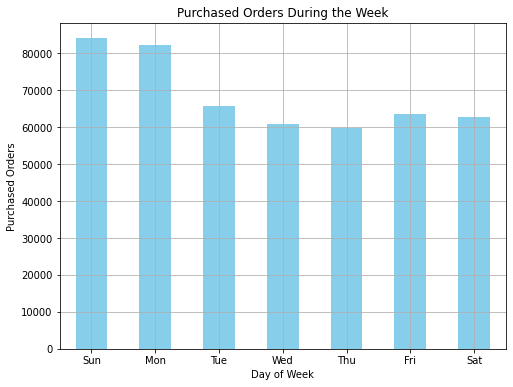

In [44]:

orders_dow = insta_or['order_dow'].value_counts().sort_index()
# Plotting the data as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
orders_dow.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Purchased Orders During the Week')
plt.xlabel('Day of Week')
plt.ylabel('Purchased Orders')

# Optional: Adding custom x-axis tick labels (assuming 0 is Sunday, 1 is Monday, and so on)
day_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(orders_dow.index, day_labels, rotation=0)

# Optional: Adding gridlines
plt.grid(True)

# Displaying the plot
plt.show()

### [A4] How long do people wait until placing another order?

In [45]:
# look at maximum time people wait for the next order
insta_or['days_since_prior_order'].max()

30.0

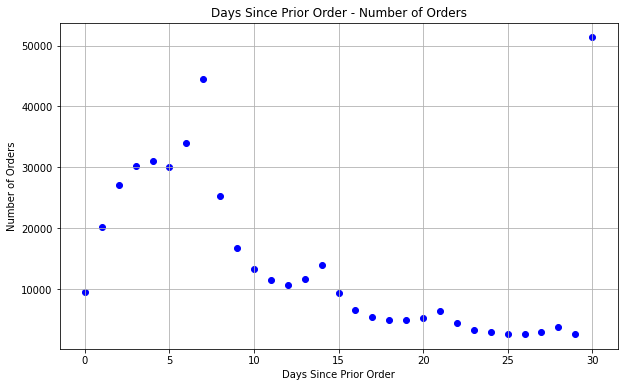

In [46]:
avg_days_before_order = insta_or['days_since_prior_order'].value_counts().sort_index()

# Extracting the unique 'Days Since Prior Order' values and their corresponding 'Number of Orders'
days_since_prior_order = avg_days_before_order.index
num_of_orders = avg_days_before_order.values

# Plotting the data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days_since_prior_order, num_of_orders, color='b', marker='o')

# Adding labels and title
plt.title('Days Since Prior Order - Number of Orders')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')

# Optional: Adding gridlines
plt.grid(True)

# Displaying the plot
plt.show()

Most people wait for 30 days until order next items.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [47]:
# DataFrame containing only Wednesday's orders
wed_orders = insta_or[insta_or['order_dow'] == 2]
print(wed_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
19        294269   107523            29          2                 10   
32       2744097     5316            27          2                 17   
41        939348    21335            28          2                 15   
46       2398578    84825             2          2                 17   
51       1739741   118405            48          2                 10   
...          ...      ...           ...        ...                ...   
478951     35425   191742            18          2                 17   
478953    475910    29597             7          2                 18   
478957    239595   141340            28          2                 14   
478960   2666119    81154            11          2                 15   
478964    885349    82944            16          2                 11   

        days_since_prior_order  
19                         1.0  
32                         8.0  
41                      

In [48]:
# DataFrame containing only Saturday's orders
sat_orders= insta_or[insta_or['order_dow'] == 5]
print(sat_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
8        2266494    34954            40          5                 15   
13        782916    36310            34          5                  9   
18        556588     6801            63          5                 11   
...          ...      ...           ...        ...                ...   
478920   2467432   116980             2          5                 20   
478929    658949   205899            86          5                 14   
478945   1387033    22496             1          5                 14   
478952   1553841   171649             6          5                 15   
478955   1485188    70371             2          5                 12   

        days_since_prior_order  
1                          9.0  
2                          2.0  
8                       

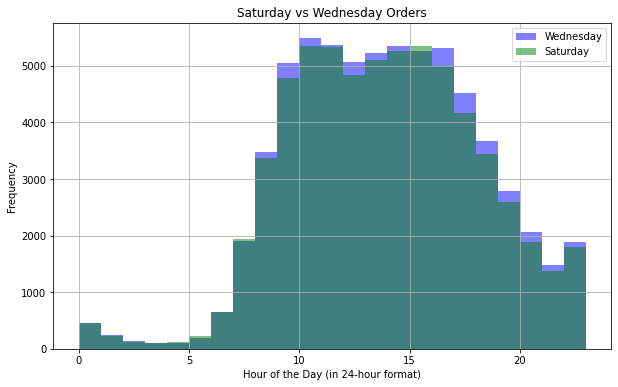

In [49]:
# Plotting histograms for both Wednesday and Saturday orders
plt.figure(figsize=(10, 6))

# Histogram for Wednesday orders
plt.hist(wed_orders['order_hour_of_day'], bins=23, alpha=0.5, label='Wednesday', color='blue')

# Histogram for Saturday orders
plt.hist(sat_orders['order_hour_of_day'], bins=23, alpha=0.5, label='Saturday', color='green')

# Adding labels and title
plt.title('Saturday vs Wednesday Orders')
plt.xlabel('Hour of the Day (in 24-hour format)')
plt.ylabel('Frequency')

# Adding a legend to distinguish Wednesday and Saturday histograms
plt.legend()

# Optional: Adding gridlines
plt.grid(True)

# Displaying the plot
plt.show()


The patterns of grocery shopping during the day are remarkably similar on both Wednesday and Saturday. However, there is a notable difference in the total number of people who shop on these two days. While the shopping hour distribution exhibits resemblances, indicating consistent shopping behaviors, Wednesday attracts a higher overall number of shoppers compared to Saturday.

### [B2] What's the distribution for the number of orders per customer?

In [50]:
# Calculate the number of orders made by each user
number_of_orders = insta_or['user_id'].value_counts()

# Display the result
print(number_of_orders.head(10))


149605    28
193164    26
78375     25
148162    24
66664     24
134511    24
54259     23
183981    23
106869    23
139660    23
Name: user_id, dtype: int64


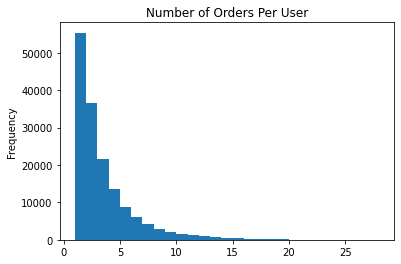

In [51]:
#ploting the histogram
number_of_orders = insta_or['user_id'].value_counts()
number_of_orders.plot(kind='hist', title='Number of Orders Per User', bins=27);

### [B3] What are the top 20 popular products (display their id and name)?

In [62]:
# Counting the occurrences of each product_id and resetting the index
pop_products = or_pro['product_id'].value_counts().reset_index()

# Renaming the columns for better clarity
pop_products.columns = ['product_id', 'value_count']

# Displaying the DataFrame pop_products
display(pop_products)

,product_id,value_count
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
...,...,...
45568,10543,1
45569,5222,1
45570,2347,1
45571,11893,1


In [63]:
# Merging 'pop_products' with 'products' to get the product names
merge1 = pop_products.merge(pro, on='product_id')[:20]

# Selecting only the 'product_id' and 'product_name' columns
result = merge1[['product_id', 'product_name']]

# Displaying the result DataFrame
display(result)

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


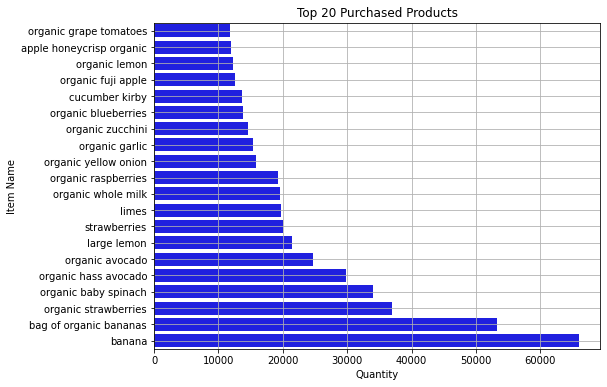

In [54]:
import seaborn as sns
# Sorting the DataFrame by 'value_count' in descending order to get the top 20 products
top_20 = merge1.sort_values(by='value_count', ascending=False).head(20)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='value_count', y='product_name', data=top_20, color='blue')

# Adding labels and title
plt.title('Top 20 Purchased Products')
plt.xlabel('Quantity')
plt.ylabel('Item Name')

# Displaying the plot with inverted y-axis for better visibility
plt.gca().invert_yaxis()

# Adding gridlines
plt.grid(True)

# Show the plot
plt.show()

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [55]:
# Merge relevant data
merged_data = pd.merge(insta_or, or_pro, on='order_id', how='inner')


In [56]:
# Calculate the number of items per order
items_per_order = merged_data.groupby('order_id')['product_id'].count()

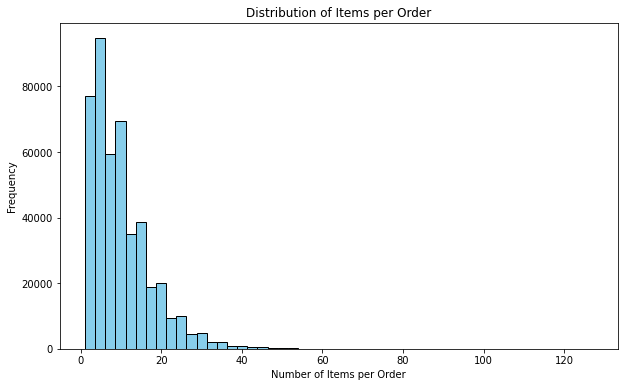

In [57]:
# Plot the distributio
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.title('Distribution of Items per Order')
plt.show()

Usually, the distribution of items per order usually situated between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

### [C3] For each product, what proportion of its orders are reorders?

In [58]:
# Merge order_products.csv and products.csv to get product names
order_product_info = pd.merge(or_pro, pro, on='product_id', how='left')

# Merge the result with instacart_orders.csv to get order details
merged_data = pd.merge(order_product_info, insta_or, on='order_id', how='left')



In [59]:
# Calculate the total number of orders and reorder count for each product
product_order_counts = merged_data.groupby('product_name')['reordered'].agg(['count', 'sum'])

# Rename the columns for clarity
product_order_counts.columns = ['total_orders', 'reorder_count']

# Calculate the proportion of orders that are reorders for each product
product_order_counts['reorder_proportion'] = product_order_counts['reorder_count'] / product_order_counts['total_orders']

In [61]:
# Sort the result in descending order of reorder proportion
product_order_counts = product_order_counts.sort_values(by='reorder_proportion', ascending=False)

# Display the result
display(product_order_counts)

,total_orders,reorder_count,reorder_proportion
product_name,,,
zzzquil vanilla cherry nighttime liquid sleep aid,3,3,1.0
jumbo ranch sunflower seeds,11,11,1.0
instant oatmeal golden & brown raisins with almonds,1,1,1.0
2% reduced fat sharp cheddar cheese,1,1,1.0
instant oatmeal apples & cranberries,1,1,1.0
...,...,...,...
natural beverage- instant- original- caffeine free,5,0,0.0
vitamin b6 100 mg tablets,1,0,0.0
low fat milk with vitamins a & d,1,0,0.0


### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 